In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

import os 
os.chdir('/content/gdrive/MyDrive/Research')

Mounted at /content/gdrive


In [2]:
import seaborn as sns
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR

from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge,LinearRegression
from sklearn.kernel_ridge import KernelRidge

from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

import keras
import tensorflow as tf

from keras.models import Sequential
from keras.layers import Dense
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel

In [3]:
Y=pd.read_excel('Data.xlsx').set_index("Date").iloc[:,0]
X_MLR=pd.read_excel('Data.xlsx').set_index("Date").iloc[:,1:4]
X=pd.read_excel('Data.xlsx').set_index("Date").iloc[:,1]


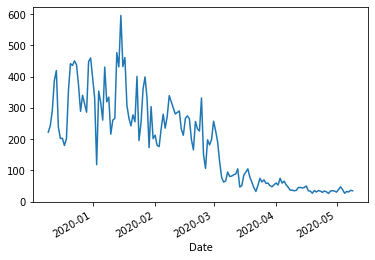

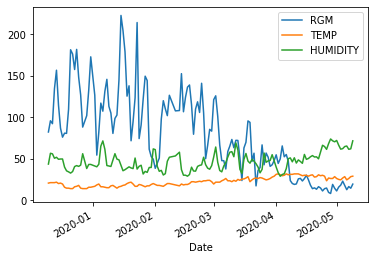

In [7]:
Y.plot()

X_MLR.plot()

In [8]:
X_MLR

,RGM,TEMP,HUMIDITY
Date,,,
2019-12-10,82.210833,20.555556,43.500000
2019-12-11,95.737083,21.111111,56.541667
2019-12-12,92.265000,21.111111,55.833333
2019-12-13,134.536670,21.111111,50.541667
2019-12-14,156.760769,21.666667,51.708333
...,...,...,...
2020-05-05,17.600000,28.333333,64.666667
2020-05-06,12.589100,24.444444,65.291667
2020-05-07,16.352500,26.111111,61.333333


In [9]:
X=X*500/(max(X))
Y=Y*500/(max(Y))
for i in X_MLR.columns:
  if i=="RGM":
    X_MLR[i]=(500*X_MLR[i])/(max(X_MLR[i]))

In [10]:
X=X.to_numpy().reshape(-1,1)
Y=Y.to_numpy().reshape(-1,1)
X_MLR=X_MLR.to_numpy()

In [11]:
X_MLR

array([[184.4532937 ,  20.55555556,  43.5       ],
       [214.80162291,  21.11111111,  56.54166667],
       [207.01144267,  21.11111111,  55.83333333],
       [301.85476778,  21.11111111,  50.54166667],
       [351.71812699,  21.66666667,  51.70833333],
       [257.25824546,  20.        ,  49.29166667],
       [194.75391111,  20.55555556,  49.625     ],
       [170.45959165,  19.44444444,  49.625     ],
       [181.23850123,  15.55555556,  39.875     ],
       [180.72600404,  14.44444444,  35.33333333],
       [246.30209132,  14.44444444,  34.125     ],
       [407.1505497 ,  13.88888889,  32.625     ],
       [395.56263563,  13.88888889,  34.45833333],
       [353.61976666,  16.11111111,  40.5       ],
       [408.09766749,  16.66666667,  41.66666667],
       [333.08279112,  17.77777778,  40.70833333],
       [284.66883554,  14.44444444,  42.25      ],
       [197.73594122,  13.88888889,  56.        ],
       [228.68952906,  13.88888889,  38.16666667],
       [297.80984115,  15.55555

In [12]:
Y

array([[186.74119932],
       [204.26967455],
       [245.34503207],
       [325.14001335],
       [352.06785116],
       [199.97468952],
       [169.68848892],
       [170.27916185],
       [150.88384397],
       [168.60034721],
       [298.38503471],
       [370.45755231],
       [365.68250866],
       [378.07913875],
       [367.59279598],
       [313.04800059],
       [242.58417963],
       [285.50041443],
       [240.20164594],
       [376.15952148],
       [385.85545233],
       [278.70424491],
       [ 99.34278304],
       [297.02045897],
       [266.11899668],
       [218.95670324],
       [361.41576451],
       [268.00897921],
       [280.80488203],
       [181.13729705],
       [218.93750278],
       [223.61553197],
       [400.03712437],
       [362.00516665],
       [500.        ],
       [362.89323514],
       [387.07496588],
       [258.84408936],
       [224.06425182],
       [203.46815959],
       [233.12182737],
       [214.59042509],
       [336.27156724],
       [164

In [4]:
def metrics_calc(Y_act,Y_pred):
  R2=r2_score(Y_act,Y_pred)
  print('Coefficient of determination R squared  : {}'.format(R2))
  MAE=mean_absolute_error(Y_act,Y_pred)
  RMSE=mean_squared_error(Y_act,Y_pred)
  print('RMSE for given case : {}'.format(RMSE))
  print('MAE for given case: {}'.format(MAE))
  bias=(1/len(Y_act))*np.sum(Y_pred-Y_act)
  CvMAE=(np.sum(Y_pred-bias-Y_act))/(np.sum(Y_act))
  nRMSE=(np.sqrt(np.sum((Y_pred-bias-Y_act)**2)))/(np.sum(Y_act))
  print('Bias corected RMSE for given case : {}'.format(nRMSE))
  print('Bias Corrected MAE for given case: {}'.format(CvMAE))


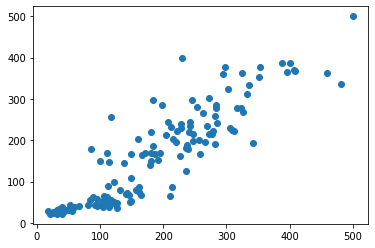

Coefficient of determination using LR : 0.8203576003123075
Coefficient of determination R squared  : 0.8783527207368714
RMSE for given case : 1639.243542146327
MAE for given case: 31.439077413532154
Bias corected RMSE for given case : 0.021890879497125534
Bias Corrected MAE for given case: 5.069825233983147e-17


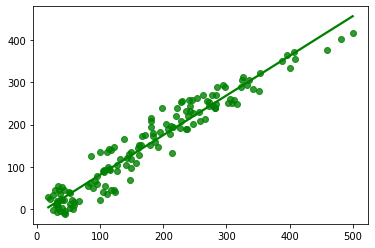

In [11]:
#Simple linear regression

import matplotlib.pyplot as plt

plt.scatter(X,Y)
plt.show()

#Train
model1 = LinearRegression()
model2 = LinearRegression()

#Single Linear regression
result1=model1.fit(X,Y)

Y_Linpred = model1.predict(X) 
print('Coefficient of determination using LR : {}'.format(r2_score(Y,Y_Linpred)))

#Multiple Linear regression
result2=model2.fit(X_MLR,Y)

'''result.fit(X_train, Y_train)
Y_pred = result.predict(X_test)

Linregr = linear_model.ElasticNet(alpha=1,random_state=400,l1_ratio=0.1)
Linregr.fit(X_valid, Y_valid)
'''
#Validate
Y_MLR_Linpred = model2.predict(X_MLR)
metrics_calc(Y,Y_MLR_Linpred)

import seaborn as sns
sns.regplot(x=X, y=Y_MLR_Linpred, ci=None, color="g")



/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.667e+05, tolerance: 1.663e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.447e+05, tolerance: 1.661e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.

Coefficient of determination R squared  : 0.8202983376995583
RMSE for given case : 2421.548523101618
MAE for given case: 35.702603897544
Bias corected RMSE for given case : 1.0227895096866129
Bias Corrected MAE for given case: 4.5425634096489e-12


Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.091e+05, tolerance: 1.817e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.194e+05, tolerance: 1.792e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

Coefficient of determination R squared  : 0.8202983376995583
RMSE for given case : 2421.548523101618
MAE for given case: 35.702603897544
Bias corected RMSE for given case : 1.0227895096866129
Bias Corrected MAE for given case: 4.5425634096489e-12


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.464e+05, tolerance: 1.981e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


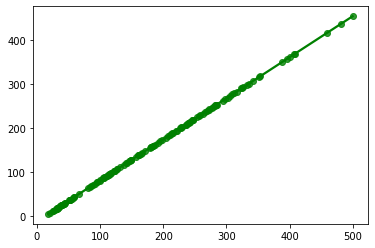

In [12]:
#Simple linear regression
from sklearn.linear_model import ElasticNet
#Train
model = ElasticNet()


parametersGrid = {"max_iter": [1, 5, 10,25,100,200],
                      "alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                      "l1_ratio": np.arange(0.0, 1.0, 0.01)}
grid1 = GridSearchCV(model, parametersGrid, scoring='r2', cv=10)
grid1.fit(X,Y)

Y_Linpred_Elastic = grid1.predict(X) 
metrics_calc(Y,Y_Linpred_Elastic)


#Multiple Linear regression

grid2 = GridSearchCV(model, parametersGrid, scoring='r2', cv=10)
grid2.fit(X_MLR, Y)

Y_MLR_Linpred_Elastic = grid1.predict(X) 
metrics_calc(Y,Y_MLR_Linpred_Elastic)

import seaborn as sns
sns.regplot(x=X, y=Y_MLR_Linpred_Elastic, ci=None, color="g")


In [13]:
rf_regr = RandomForestRegressor(n_estimators=100,max_depth=18, random_state=200, criterion='squared_error',ccp_alpha=0.0005)
rf_regr_MLR = RandomForestRegressor(n_estimators=100,max_depth=17, random_state=200, criterion='squared_error',ccp_alpha=0.0005)
rf_regr.fit(X, Y)
rf_regr_MLR.fit(X_MLR, Y)  

<ipython-input-13-544919e19ada>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_regr.fit(X, Y)
<ipython-input-13-544919e19ada>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_regr_MLR.fit(X_MLR, Y)


RandomForestRegressor(ccp_alpha=0.0005, max_depth=17, random_state=200)

In [14]:
from sklearn.ensemble import RandomForestRegressor
rf1 = RandomForestRegressor(random_state = 42)
from pprint import pprint
print('Parameters currently in use:\n')
pprint(rf1.get_params())
from sklearn.model_selection import RandomizedSearchCV
n_estimators1 = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features1 = ['auto', 'sqrt']
max_depth1 = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth1.append(None)
min_samples_split1 = [2, 5, 10]
min_samples_leaf1 = [1, 2, 4]
bootstrap1 = [True, False]

random_grid1 = {'n_estimators': n_estimators1,'max_features': max_features1,'max_depth': max_depth1,'min_samples_split': min_samples_split1,'min_samples_leaf': min_samples_leaf1,  'bootstrap': bootstrap1}
rf1= RandomForestRegressor()
rf_random1 = RandomizedSearchCV(estimator = rf1, param_distributions = random_grid1, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random1.fit(X, Y)
print(rf_random1.best_params_)

rf2 = RandomForestRegressor(random_state = 42)
from pprint import pprint
print('Parameters currently in use:\n')
pprint(rf2.get_params())
from sklearn.model_selection import RandomizedSearchCV
n_estimators2 = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features2 = ['auto', 'sqrt']
max_depth2 = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth2.append(None)
min_samples_split2 = [2, 5, 10]
min_samples_leaf2 = [1, 2, 4]
bootstrap2 = [True, False]

random_grid2 = {'n_estimators': n_estimators1,'max_features': max_features1,'max_depth': max_depth1,'min_samples_split': min_samples_split1,'min_samples_leaf': min_samples_leaf1,'bootstrap': bootstrap1}
rf2= RandomForestRegressor()
rf_random2 = RandomizedSearchCV(estimator = rf2, param_distributions = random_grid2, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random2.fit(X_MLR, Y)
print(rf_random2.best_params_)


y_pred_rf_SV = rf_regr.predict(X)
y_pred_rf_MV = rf_regr_MLR.predict(X_MLR)
print('Coefficient of determination for single predictor: {}'.format(r2_score(Y, y_pred_rf_SV)))
metrics_calc(Y,y_pred_rf_SV)



print('Coefficient of determination for multi variate predictor: {}'.format(r2_score(Y,y_pred_rf_MV)))
metrics_calc(Y,y_pred_rf_MV)

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}
Fitting 3 folds for each of 100 candidates, totalling 300 fits


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


{'n_estimators': 1800, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 30, 'bootstrap': False}
Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}
Fitting 3 folds for each of 100 candidates, totalling 300 fits


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


{'n_estimators': 1600, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 90, 'bootstrap': True}
Coefficient of determination for single predictor: 0.9653254543017741
Coefficient of determination R squared  : 0.9653254543017741
RMSE for given case : 467.2527446316905
MAE for given case: 14.767246951926634
Bias corected RMSE for given case : 1.0865506099689235
Bias Corrected MAE for given case: 40.7315096836811
Coefficient of determination for multi variate predictor: 0.9833503950963756
Coefficient of determination R squared  : 0.9833503950963756
RMSE for given case : 224.35978414707242
MAE for given case: 9.728650023110072
Bias corected RMSE for given case : 1.1594472973548777
Bias Corrected MAE for given case: -68.68278527573638


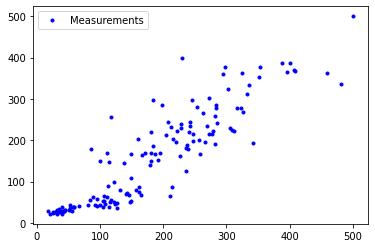

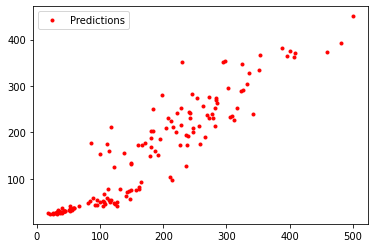

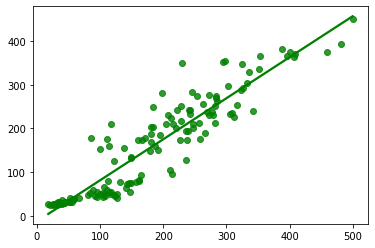

In [15]:
Y_pred_rf_test = rf_regr.predict(X)
Y_pred_rf_MLR = rf_regr_MLR.predict(X_MLR)
plt.plot(X, Y, '.',color='b')
plt.legend(["Measurements"])
plt.show()
plt.plot(X,Y_pred_rf_MLR, '.', color='r')
plt.legend([ "Predictions"])
plt.show()

import seaborn as sns
import seaborn as sns
sns.regplot(x=X, y=Y_pred_rf_MLR, ci=None, color="g")



In [13]:
#Neural Networks
model1 = Sequential()
model1.add(Dense(200, input_shape=(X.shape[1],), activation='relu'))
model1.add(Dense(200, input_dim=200, activation='relu'))
model1.add(Dense(200, input_dim=200, activation='relu'))
model1.add(Dense(200, input_dim=200, activation='relu'))
model1.add(Dense(200, input_dim=200, activation='relu'))
model1.add(Dense(200, input_dim=200, activation='relu'))
model1.add(Dense(200, input_dim=200, activation='relu'))
model1.add(Dense(200, input_dim=200, activation='relu'))
model1.add(Dense(200, input_dim=200, activation='relu'))
model1.add(Dense(Y.shape[1], activation='linear'))

model2 = Sequential()
model2.add(Dense(200, input_shape=(X_MLR.shape[1],), activation='relu'))
model2.add(Dense(200, input_dim=200, activation='relu'))
model2.add(Dense(200, input_dim=200, activation='relu'))
model2.add(Dense(Y.shape[1], activation='linear'))

In [14]:
tf.keras.optimizers.Adam(learning_rate=0.0001, beta_1=0.99, beta_2=0.999, amsgrad=False)
model1.compile(loss='mean_squared_error', optimizer='RMSprop', metrics=['mean_absolute_percentage_error'])

tf.keras.optimizers.Adam(learning_rate=0.01, beta_1=0.99, beta_2=0.999, amsgrad=False)
model2.compile(loss='mean_squared_error', optimizer='RMSprop', metrics=['mean_absolute_percentage_error'])
model1.fit(X, Y, epochs=50, batch_size=32,validation_split=0.15,validation_data=None,verbose=1)
model2.fit(X_MLR, Y, epochs=50, batch_size=32,validation_split=0.15,validation_data=None,verbose=1)



Epoch 1/50
4/4 [==============================] - 1s 69ms/step - loss: 30916.3555 - mean_absolute_percentage_error: 83.6643 - val_loss: 310.7638 - val_mean_absolute_percentage_error: 61.1025
Epoch 2/50
4/4 [==============================] - 0s 13ms/step - loss: 8865.8174 - mean_absolute_percentage_error: 45.8917 - val_loss: 45.2488 - val_mean_absolute_percentage_error: 19.9534
Epoch 3/50
4/4 [==============================] - 0s 11ms/step - loss: 7315.3735 - mean_absolute_percentage_error: 52.7551 - val_loss: 295.9994 - val_mean_absolute_percentage_error: 59.5407
Epoch 4/50
4/4 [==============================] - 0s 11ms/step - loss: 10623.9502 - mean_absolute_percentage_error: 47.7026 - val_loss: 38.3626 - val_mean_absolute_percentage_error: 18.6754
Epoch 5/50
4/4 [==============================] - 0s 11ms/step - loss: 3245.0110 - mean_absolute_percentage_error: 39.6096 - val_loss: 38.4875 - val_mean_absolute_percentage_error: 18.7110
Epoch 6/50
4/4 [==============================] - 0

In [15]:
model1.fit(X, Y, epochs=150, batch_size=32,validation_split=0.15,validation_data=None,verbose=1)
model2.fit(X_MLR, Y, epochs=150, batch_size=32,validation_split=0.15,validation_data=None,verbose=1)

Epoch 1/150
4/4 [==============================] - 0s 24ms/step - loss: 7148.7720 - mean_absolute_percentage_error: 46.8342 - val_loss: 55.9625 - val_mean_absolute_percentage_error: 22.5903
Epoch 2/150
4/4 [==============================] - 0s 12ms/step - loss: 3538.0417 - mean_absolute_percentage_error: 37.9240 - val_loss: 49.4288 - val_mean_absolute_percentage_error: 18.6780
Epoch 3/150
4/4 [==============================] - 0s 12ms/step - loss: 3040.1482 - mean_absolute_percentage_error: 38.9712 - val_loss: 62.8093 - val_mean_absolute_percentage_error: 20.3005
Epoch 4/150
4/4 [==============================] - 0s 13ms/step - loss: 4290.1348 - mean_absolute_percentage_error: 47.2984 - val_loss: 122.7463 - val_mean_absolute_percentage_error: 35.8119
Epoch 5/150
4/4 [==============================] - 0s 11ms/step - loss: 4159.5269 - mean_absolute_percentage_error: 39.5035 - val_loss: 85.0501 - val_mean_absolute_percentage_error: 23.9123
Epoch 6/150
4/4 [==============================] 

5/5 [==============================] - 0s 2ms/step
Coefficient of determination for single variable case case: 0.7836091514156296
Coefficient of determination for multiple regression case: 0.8651274361231321


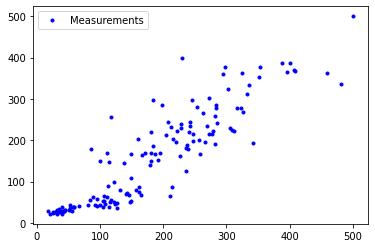

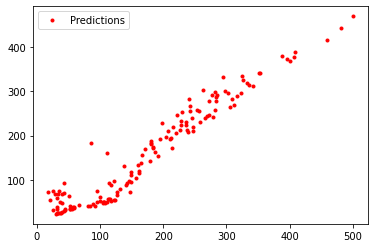

Coefficient of determination R squared  : 0.8651274361231321
RMSE for given case : 1817.459302724297
MAE for given case: 28.944263405188195
Bias corected RMSE for given case : 0.022598247652384593
Bias Corrected MAE for given case: 1.4278765920803695e-08


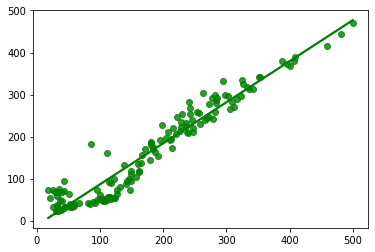

In [16]:
y_pred_nn_pka_valid = model1.predict(X)
y_pred_nn_polY_valid = model2.predict(X_MLR)
print('Coefficient of determination for single variable case case: {}'.format(r2_score(Y, y_pred_nn_pka_valid)))
print('Coefficient of determination for multiple regression case: {}'.format(r2_score(Y, y_pred_nn_polY_valid)))

plt.plot(X,Y,".",color='b')
plt.legend(["Measurements"])
plt.show()
plt.plot(X,y_pred_nn_polY_valid,".",color='r')
plt.legend(["Predictions"])
plt.show()

import seaborn as sns
import seaborn as sns
sns.regplot(x=X, y=y_pred_nn_polY_valid, ci=None, color="g")

metrics_calc(Y,y_pred_nn_polY_valid)

In [20]:
from sklearn.svm import SVR

svr_sv_linear = SVR(kernel='linear',C=1.842,epsilon=0.002)
svr_sv_linear.fit(X, Y)

svr_mv_linear = SVR(kernel='linear',C=1.389,epsilon=0.002)
svr_mv_linear.fit(X_MLR, Y)


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.389, epsilon=0.002, kernel='linear')

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

#Tuning Hyperparameters using Grid Search
param_grid1 = {'C': [0.1, 1, 10, 100, 1000],'gamma': [1, 0.1, 0.01, 0.001, 0.0001],'kernel': ['linear']              }
 
grid1 = GridSearchCV(SVR(), param_grid1, refit = True, verbose = 3)
grid1.fit(X, Y)

param_grid2= {'C': [0.1, 1, 10, 100, 1000],'gamma': [1, 0.1, 0.01, 0.001, 0.0001],'kernel': ['linear']              }
 
grid2 = GridSearchCV(SVR(), param_grid2, refit = True, verbose = 3)
grid2.fit(X_MLR, Y)

print(grid1.best_params_)
print(grid1.best_estimator_)
print(grid2.best_params_)
print(grid2.best_estimator_)


y_pred_linear_sv = grid1.predict(X)
y_pred_linear_mv =grid2.predict(X_MLR)

metrics_calc(y_pred_linear_sv, Y)
metrics_calc(y_pred_linear_mv, Y)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.186 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.301 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.339 total time=   0.0s
[CV 4/5] END ...C=0.1, gamma=1, kernel=linear;, score=-11.614 total time=   0.0s
[CV 5/5] END ...C=0.1, gamma=1, kernel=linear;, score=-33.673 total time=   0.0s
[CV 1/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.186 total time=   0.0s
[CV 2/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.301 total time=   0.0s
[CV 3/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.339 total time=   0.0s
[CV 4/5] END .C=0.1, gamma=0.1, kernel=linear;, score=-11.614 total time=   0.0s
[CV 5/5] END .C=0.1, gamma=0.1, kernel=linear;, score=-33.673 total time=   0.0s
[CV 1/5] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.186 total time=   0.0s
[CV 2/5] END ..C=0.1, gamma=0.01, kernel=linear

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV 5/5] END .....C=1, gamma=1, kernel=linear;, score=-33.670 total time=   0.0s
[CV 1/5] END .....C=1, gamma=0.1, kernel=linear;, score=0.185 total time=   0.0s
[CV 2/5] END .....C=1, gamma=0.1, kernel=linear;, score=0.301 total time=   0.0s
[CV 3/5] END .....C=1, gamma=0.1, kernel=linear;, score=0.339 total time=   0.0s
[CV 4/5] END ...C=1, gamma=0.1, kernel=linear;, score=-11.614 total time=   0.0s
[CV 5/5] END ...C=1, gamma=0.1, kernel=linear;, score=-33.670 total time=   0.0s
[CV 1/5] END ....C=1, gamma=0.01, kernel=linear;, score=0.185 total time=   0.0s
[CV 2/5] END ....C=1, gamma=0.01, kernel=linear;, score=0.301 total time=   0.0s
[CV 3/5] END ....C=1, gamma=0.01, kernel=linear;, score=0.339 total time=   0.0s
[CV 4/5] END ..C=1, gamma=0.01, kernel=linear;, score=-11.614 total time=   0.0s
[CV 5/5] END ..C=1, gamma=0.01, kernel=linear;, score=-33.670 total time=   0.0s
[CV 1/5] END ...C=1, gamma=0.001, kernel=linear;, score=0.185 total time=   0.0s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV 2/5] END ...C=1, gamma=0.001, kernel=linear;, score=0.301 total time=   0.0s
[CV 3/5] END ...C=1, gamma=0.001, kernel=linear;, score=0.339 total time=   0.0s
[CV 4/5] END .C=1, gamma=0.001, kernel=linear;, score=-11.614 total time=   0.0s
[CV 5/5] END .C=1, gamma=0.001, kernel=linear;, score=-33.670 total time=   0.0s
[CV 1/5] END ..C=1, gamma=0.0001, kernel=linear;, score=0.185 total time=   0.0s
[CV 2/5] END ..C=1, gamma=0.0001, kernel=linear;, score=0.301 total time=   0.0s
[CV 3/5] END ..C=1, gamma=0.0001, kernel=linear;, score=0.339 total time=   0.0s
[CV 4/5] END C=1, gamma=0.0001, kernel=linear;, score=-11.614 total time=   0.0s
[CV 5/5] END C=1, gamma=0.0001, kernel=linear;, score=-33.670 total time=   0.0s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV 1/5] END ......C=10, gamma=1, kernel=linear;, score=0.183 total time=   0.2s
[CV 2/5] END ......C=10, gamma=1, kernel=linear;, score=0.301 total time=   0.1s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ......C=10, gamma=1, kernel=linear;, score=0.337 total time=   0.2s
[CV 4/5] END ....C=10, gamma=1, kernel=linear;, score=-11.617 total time=   0.1s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ....C=10, gamma=1, kernel=linear;, score=-33.635 total time=   0.1s
[CV 1/5] END ....C=10, gamma=0.1, kernel=linear;, score=0.183 total time=   0.2s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ....C=10, gamma=0.1, kernel=linear;, score=0.301 total time=   0.1s
[CV 3/5] END ....C=10, gamma=0.1, kernel=linear;, score=0.337 total time=   0.2s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ..C=10, gamma=0.1, kernel=linear;, score=-11.617 total time=   0.1s
[CV 5/5] END ..C=10, gamma=0.1, kernel=linear;, score=-33.635 total time=   0.1s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ...C=10, gamma=0.01, kernel=linear;, score=0.183 total time=   0.2s
[CV 2/5] END ...C=10, gamma=0.01, kernel=linear;, score=0.301 total time=   0.1s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ...C=10, gamma=0.01, kernel=linear;, score=0.337 total time=   0.2s
[CV 4/5] END .C=10, gamma=0.01, kernel=linear;, score=-11.617 total time=   0.1s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END .C=10, gamma=0.01, kernel=linear;, score=-33.635 total time=   0.1s
[CV 1/5] END ..C=10, gamma=0.001, kernel=linear;, score=0.183 total time=   0.1s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ..C=10, gamma=0.001, kernel=linear;, score=0.301 total time=   0.1s
[CV 3/5] END ..C=10, gamma=0.001, kernel=linear;, score=0.337 total time=   0.2s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END C=10, gamma=0.001, kernel=linear;, score=-11.617 total time=   0.2s
[CV 5/5] END C=10, gamma=0.001, kernel=linear;, score=-33.635 total time=   0.1s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END .C=10, gamma=0.0001, kernel=linear;, score=0.183 total time=   0.1s
[CV 2/5] END .C=10, gamma=0.0001, kernel=linear;, score=0.301 total time=   0.1s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END .C=10, gamma=0.0001, kernel=linear;, score=0.337 total time=   0.2s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END C=10, gamma=0.0001, kernel=linear;, score=-11.617 total time=   0.2s
[CV 5/5] END C=10, gamma=0.0001, kernel=linear;, score=-33.635 total time=   0.2s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END .....C=100, gamma=1, kernel=linear;, score=0.158 total time=   2.3s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END .....C=100, gamma=1, kernel=linear;, score=0.299 total time=   1.1s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END .....C=100, gamma=1, kernel=linear;, score=0.317 total time=   1.5s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ...C=100, gamma=1, kernel=linear;, score=-11.641 total time=   1.7s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ...C=100, gamma=1, kernel=linear;, score=-33.290 total time=   0.8s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ...C=100, gamma=0.1, kernel=linear;, score=0.158 total time=   1.2s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ...C=100, gamma=0.1, kernel=linear;, score=0.299 total time=   0.6s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ...C=100, gamma=0.1, kernel=linear;, score=0.317 total time=   1.1s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END .C=100, gamma=0.1, kernel=linear;, score=-11.641 total time=   1.7s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END .C=100, gamma=0.1, kernel=linear;, score=-33.290 total time=   0.8s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ..C=100, gamma=0.01, kernel=linear;, score=0.158 total time=   1.1s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ..C=100, gamma=0.01, kernel=linear;, score=0.299 total time=   0.6s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ..C=100, gamma=0.01, kernel=linear;, score=0.317 total time=   1.1s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END C=100, gamma=0.01, kernel=linear;, score=-11.641 total time=   1.7s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END C=100, gamma=0.01, kernel=linear;, score=-33.290 total time=   0.8s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END .C=100, gamma=0.001, kernel=linear;, score=0.158 total time=   1.1s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END .C=100, gamma=0.001, kernel=linear;, score=0.299 total time=   0.6s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END .C=100, gamma=0.001, kernel=linear;, score=0.317 total time=   1.1s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END C=100, gamma=0.001, kernel=linear;, score=-11.641 total time=   1.6s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END C=100, gamma=0.001, kernel=linear;, score=-33.290 total time=   0.8s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END C=100, gamma=0.0001, kernel=linear;, score=0.158 total time=   1.1s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END C=100, gamma=0.0001, kernel=linear;, score=0.299 total time=   0.6s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END C=100, gamma=0.0001, kernel=linear;, score=0.317 total time=   1.1s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END C=100, gamma=0.0001, kernel=linear;, score=-11.641 total time=   1.7s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END C=100, gamma=0.0001, kernel=linear;, score=-33.290 total time=   0.8s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ....C=1000, gamma=1, kernel=linear;, score=0.206 total time=   6.7s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ....C=1000, gamma=1, kernel=linear;, score=0.240 total time=   5.3s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ....C=1000, gamma=1, kernel=linear;, score=0.373 total time=  29.3s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ..C=1000, gamma=1, kernel=linear;, score=-12.433 total time=  20.1s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ..C=1000, gamma=1, kernel=linear;, score=-29.389 total time=   7.2s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ..C=1000, gamma=0.1, kernel=linear;, score=0.206 total time=   6.6s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ..C=1000, gamma=0.1, kernel=linear;, score=0.240 total time=   5.3s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ..C=1000, gamma=0.1, kernel=linear;, score=0.373 total time=  28.9s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END C=1000, gamma=0.1, kernel=linear;, score=-12.433 total time=  20.1s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END C=1000, gamma=0.1, kernel=linear;, score=-29.389 total time=   7.3s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END .C=1000, gamma=0.01, kernel=linear;, score=0.206 total time=   6.7s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END .C=1000, gamma=0.01, kernel=linear;, score=0.240 total time=   5.4s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END .C=1000, gamma=0.01, kernel=linear;, score=0.373 total time=  31.2s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END C=1000, gamma=0.01, kernel=linear;, score=-12.433 total time=  20.0s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END C=1000, gamma=0.01, kernel=linear;, score=-29.389 total time=   7.3s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END C=1000, gamma=0.001, kernel=linear;, score=0.206 total time=   6.7s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END C=1000, gamma=0.001, kernel=linear;, score=0.240 total time=   5.3s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END C=1000, gamma=0.001, kernel=linear;, score=0.373 total time=  29.0s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END C=1000, gamma=0.001, kernel=linear;, score=-12.433 total time=  20.0s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END C=1000, gamma=0.001, kernel=linear;, score=-29.389 total time=   7.3s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END C=1000, gamma=0.0001, kernel=linear;, score=0.206 total time=   6.7s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END C=1000, gamma=0.0001, kernel=linear;, score=0.240 total time=   5.3s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END C=1000, gamma=0.0001, kernel=linear;, score=0.373 total time=  29.0s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END C=1000, gamma=0.0001, kernel=linear;, score=-12.433 total time=  20.1s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END C=1000, gamma=0.0001, kernel=linear;, score=-29.389 total time=   7.2s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.396 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.399 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.400 total time=   0.0s
[CV 4/5] END ....C=0.1, gamma=1, kernel=linear;, score=-7.559 total time=   0.0s
[CV 5/5] END ...C=0.1, gamma=1, kernel=linear;, score=-23.791 total time=   0.0s
[CV 1/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.396 total time=   0.0s
[CV 2/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.399 total time=   0.0s
[CV 3/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.400 total time=   0.0s
[CV 4/5] END ..C=0.1, gamma=0.1, kernel=linear;, score=-7.559 total time=   0.0s
[CV 5/5] END .C=0.1, gamma=0.1, kernel=linear;, score=-23.791 total time=   0.0s
[CV 1/5] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.396 total time=   0.0s
[CV 2/5] END ..C=0.1, gamma=0.01, kernel=linear

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV 3/5] END .......C=1, gamma=1, kernel=linear;, score=0.487 total time=   0.1s
[CV 4/5] END ......C=1, gamma=1, kernel=linear;, score=-7.260 total time=   0.1s
[CV 5/5] END .....C=1, gamma=1, kernel=linear;, score=-34.343 total time=   0.0s
[CV 1/5] END .....C=1, gamma=0.1, kernel=linear;, score=0.397 total time=   0.0s
[CV 2/5] END .....C=1, gamma=0.1, kernel=linear;, score=0.440 total time=   0.0s
[CV 3/5] END .....C=1, gamma=0.1, kernel=linear;, score=0.487 total time=   0.1s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV 4/5] END ....C=1, gamma=0.1, kernel=linear;, score=-7.260 total time=   0.1s
[CV 5/5] END ...C=1, gamma=0.1, kernel=linear;, score=-34.343 total time=   0.0s
[CV 1/5] END ....C=1, gamma=0.01, kernel=linear;, score=0.397 total time=   0.0s
[CV 2/5] END ....C=1, gamma=0.01, kernel=linear;, score=0.440 total time=   0.0s
[CV 3/5] END ....C=1, gamma=0.01, kernel=linear;, score=0.487 total time=   0.0s
[CV 4/5] END ...C=1, gamma=0.01, kernel=linear;, score=-7.260 total time=   0.1s
[CV 5/5] END ..C=1, gamma=0.01, kernel=linear;, score=-34.343 total time=   0.0s
[CV 1/5] END ...C=1, gamma=0.001, kernel=linear;, score=0.397 total time=   0.0s
[CV 2/5] END ...C=1, gamma=0.001, kernel=linear;, score=0.440 total time=   0.0s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV 3/5] END ...C=1, gamma=0.001, kernel=linear;, score=0.487 total time=   0.1s
[CV 4/5] END ..C=1, gamma=0.001, kernel=linear;, score=-7.260 total time=   0.1s
[CV 5/5] END .C=1, gamma=0.001, kernel=linear;, score=-34.343 total time=   0.0s
[CV 1/5] END ..C=1, gamma=0.0001, kernel=linear;, score=0.397 total time=   0.0s
[CV 2/5] END ..C=1, gamma=0.0001, kernel=linear;, score=0.440 total time=   0.0s
[CV 3/5] END ..C=1, gamma=0.0001, kernel=linear;, score=0.487 total time=   0.0s
[CV 4/5] END .C=1, gamma=0.0001, kernel=linear;, score=-7.260 total time=   0.1s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV 5/5] END C=1, gamma=0.0001, kernel=linear;, score=-34.343 total time=   0.0s
[CV 1/5] END ......C=10, gamma=1, kernel=linear;, score=0.403 total time=   0.1s
[CV 2/5] END ......C=10, gamma=1, kernel=linear;, score=0.441 total time=   0.1s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ......C=10, gamma=1, kernel=linear;, score=0.488 total time=   1.4s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END .....C=10, gamma=1, kernel=linear;, score=-7.233 total time=   0.2s
[CV 5/5] END ....C=10, gamma=1, kernel=linear;, score=-30.771 total time=   0.1s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ....C=10, gamma=0.1, kernel=linear;, score=0.403 total time=   0.1s
[CV 2/5] END ....C=10, gamma=0.1, kernel=linear;, score=0.441 total time=   0.1s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ....C=10, gamma=0.1, kernel=linear;, score=0.488 total time=   1.4s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ...C=10, gamma=0.1, kernel=linear;, score=-7.233 total time=   0.2s
[CV 5/5] END ..C=10, gamma=0.1, kernel=linear;, score=-30.771 total time=   0.1s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ...C=10, gamma=0.01, kernel=linear;, score=0.403 total time=   0.1s
[CV 2/5] END ...C=10, gamma=0.01, kernel=linear;, score=0.441 total time=   0.1s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ...C=10, gamma=0.01, kernel=linear;, score=0.488 total time=   1.4s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ..C=10, gamma=0.01, kernel=linear;, score=-7.233 total time=   0.2s
[CV 5/5] END .C=10, gamma=0.01, kernel=linear;, score=-30.771 total time=   0.1s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ..C=10, gamma=0.001, kernel=linear;, score=0.403 total time=   0.1s
[CV 2/5] END ..C=10, gamma=0.001, kernel=linear;, score=0.441 total time=   0.1s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ..C=10, gamma=0.001, kernel=linear;, score=0.488 total time=   2.0s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END .C=10, gamma=0.001, kernel=linear;, score=-7.233 total time=   0.4s
[CV 5/5] END C=10, gamma=0.001, kernel=linear;, score=-30.771 total time=   0.2s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END .C=10, gamma=0.0001, kernel=linear;, score=0.403 total time=   0.3s
[CV 2/5] END .C=10, gamma=0.0001, kernel=linear;, score=0.441 total time=   0.1s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END .C=10, gamma=0.0001, kernel=linear;, score=0.488 total time=   2.4s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END C=10, gamma=0.0001, kernel=linear;, score=-7.233 total time=   0.2s
[CV 5/5] END C=10, gamma=0.0001, kernel=linear;, score=-30.771 total time=   0.1s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END .....C=100, gamma=1, kernel=linear;, score=0.426 total time=   0.4s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END .....C=100, gamma=1, kernel=linear;, score=0.436 total time=   0.4s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END .....C=100, gamma=1, kernel=linear;, score=0.497 total time=   2.3s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ....C=100, gamma=1, kernel=linear;, score=-6.775 total time=   2.4s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ...C=100, gamma=1, kernel=linear;, score=-32.354 total time=   1.0s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ...C=100, gamma=0.1, kernel=linear;, score=0.426 total time=   0.4s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ...C=100, gamma=0.1, kernel=linear;, score=0.436 total time=   0.4s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ...C=100, gamma=0.1, kernel=linear;, score=0.497 total time=   2.4s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ..C=100, gamma=0.1, kernel=linear;, score=-6.775 total time=   2.3s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END .C=100, gamma=0.1, kernel=linear;, score=-32.354 total time=   1.0s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ..C=100, gamma=0.01, kernel=linear;, score=0.426 total time=   0.4s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ..C=100, gamma=0.01, kernel=linear;, score=0.436 total time=   0.4s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ..C=100, gamma=0.01, kernel=linear;, score=0.497 total time=   2.3s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END .C=100, gamma=0.01, kernel=linear;, score=-6.775 total time=   2.4s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END C=100, gamma=0.01, kernel=linear;, score=-32.354 total time=   1.0s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END .C=100, gamma=0.001, kernel=linear;, score=0.426 total time=   0.4s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END .C=100, gamma=0.001, kernel=linear;, score=0.436 total time=   0.4s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END .C=100, gamma=0.001, kernel=linear;, score=0.497 total time=   2.3s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END C=100, gamma=0.001, kernel=linear;, score=-6.775 total time=   2.3s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END C=100, gamma=0.001, kernel=linear;, score=-32.354 total time=   1.0s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END C=100, gamma=0.0001, kernel=linear;, score=0.426 total time=   0.4s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END C=100, gamma=0.0001, kernel=linear;, score=0.436 total time=   0.4s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END C=100, gamma=0.0001, kernel=linear;, score=0.497 total time=   2.3s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END C=100, gamma=0.0001, kernel=linear;, score=-6.775 total time=   2.3s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END C=100, gamma=0.0001, kernel=linear;, score=-32.354 total time=   1.0s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ....C=1000, gamma=1, kernel=linear;, score=0.369 total time=   3.6s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ....C=1000, gamma=1, kernel=linear;, score=0.391 total time=   5.1s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ....C=1000, gamma=1, kernel=linear;, score=0.422 total time=   8.8s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ...C=1000, gamma=1, kernel=linear;, score=-7.275 total time=   7.4s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ..C=1000, gamma=1, kernel=linear;, score=-34.631 total time=  27.5s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ..C=1000, gamma=0.1, kernel=linear;, score=0.369 total time=   3.6s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ..C=1000, gamma=0.1, kernel=linear;, score=0.391 total time=   5.1s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ..C=1000, gamma=0.1, kernel=linear;, score=0.422 total time=   8.9s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END .C=1000, gamma=0.1, kernel=linear;, score=-7.275 total time=   7.4s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END C=1000, gamma=0.1, kernel=linear;, score=-34.631 total time=  27.8s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END .C=1000, gamma=0.01, kernel=linear;, score=0.369 total time=   3.6s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END .C=1000, gamma=0.01, kernel=linear;, score=0.391 total time=   5.1s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END .C=1000, gamma=0.01, kernel=linear;, score=0.422 total time=   8.9s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END C=1000, gamma=0.01, kernel=linear;, score=-7.275 total time=   7.4s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END C=1000, gamma=0.01, kernel=linear;, score=-34.631 total time=  28.7s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END C=1000, gamma=0.001, kernel=linear;, score=0.369 total time=   4.9s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END C=1000, gamma=0.001, kernel=linear;, score=0.391 total time=   5.1s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END C=1000, gamma=0.001, kernel=linear;, score=0.422 total time=   8.9s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END C=1000, gamma=0.001, kernel=linear;, score=-7.275 total time=   7.4s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END C=1000, gamma=0.001, kernel=linear;, score=-34.631 total time=  27.8s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END C=1000, gamma=0.0001, kernel=linear;, score=0.369 total time=   3.6s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END C=1000, gamma=0.0001, kernel=linear;, score=0.391 total time=   5.1s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END C=1000, gamma=0.0001, kernel=linear;, score=0.422 total time=   8.9s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END C=1000, gamma=0.0001, kernel=linear;, score=-7.275 total time=   7.4s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END C=1000, gamma=0.0001, kernel=linear;, score=-34.631 total time=  27.8s
{'C': 1000, 'gamma': 1, 'kernel': 'linear'}
SVR(C=1000, gamma=1, kernel='linear')
{'C': 0.1, 'gamma': 1, 'kernel': 'linear'}
SVR(C=0.1, gamma=1, kernel='linear')
Coefficient of determination R squared  : 0.7982476446558605
RMSE for given case : 2499.6579909004863
MAE for given case: 36.70951590055549
Bias corected RMSE for given case : 5.95851249758937
Bias Corrected MAE for given case: 863.1787881209485
Coefficient of determination R squared  : 0.8417385563565789
RMSE for given case : 1788.8450986230682
MAE for given case: 31.20870164212426
Bias corected RMSE for given case : 1.7069897756749888
Bias Corrected MAE for given case: 200.95735156192654


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


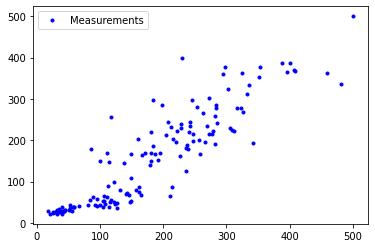

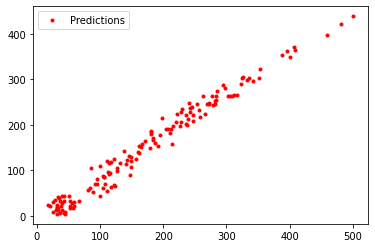

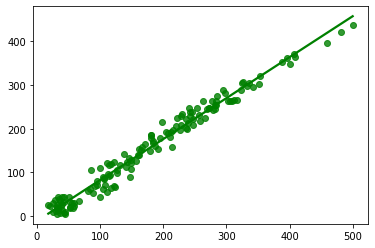

In [22]:
plt.plot(X,Y,".",color='b')
plt.legend(["Measurements"])
plt.show()
plt.plot(X,y_pred_linear_mv,".",color='r')
plt.legend(["Predictions"])
plt.show()

import seaborn as sns
import seaborn as sns
sns.regplot(x=X, y=y_pred_linear_mv, ci=None, color="g")

In [23]:
#Regression Trees
dt_regr_sv = DecisionTreeRegressor(max_depth=11,criterion='squared_error',random_state=200)
dt_regr_mv = DecisionTreeRegressor(max_depth=13,criterion='squared_error',random_state=200)
dt_regr_sv.fit(X,Y)
dt_regr_mv.fit(X_MLR,Y)

DecisionTreeRegressor(max_depth=13, random_state=200)

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
912 fits failed out of a total of 1216.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
912 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py", line 1315, in fit
    super().fit(
  File "/usr/local/lib/python3.8/dist-packages/sklearn/tre

nan
-84.92583178613738
Coefficient of determination R squared  : 0.85931980919136
RMSE for given case : 1661.9200619891233
MAE for given case: 27.57369698045459
Bias corected RMSE for given case : 1.0424725377128286
Bias Corrected MAE for given case: 0.0
Coefficient of determination R squared  : 0.993998722238167
RMSE for given case : 80.86950957967669
MAE for given case: 3.807009551195655
Bias corected RMSE for given case : 1.0745660505547563
Bias Corrected MAE for given case: 0.0


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
304 fits failed out of a total of 1216.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
304 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py", line 1315, in fit
    super().fit(
  File "/usr/local/lib/python3.8/dist-packages/sklearn/tre

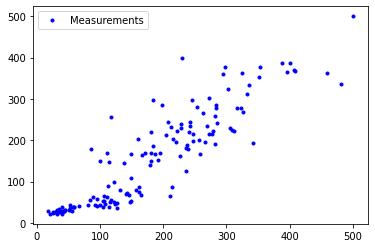

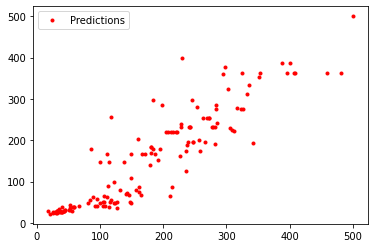

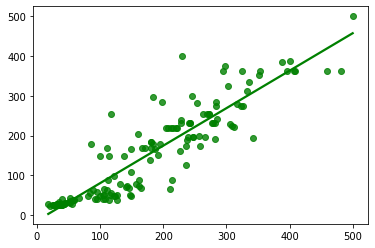

In [17]:
from scipy.stats import randint
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

param_dist1 = {'decisiontreeregressor__max_depth': range(1,20),'decisiontreeregressor__max_features': range(1, 5),'decisiontreeregressor__min_samples_leaf': range(1, 5)}
pipe1 = make_pipeline(StandardScaler(),DecisionTreeRegressor())
grid1 = GridSearchCV(pipe1, dict(param_dist1), cv = 4, n_jobs=-1)  
grid1.fit(X, Y)
print(grid1.cv_results_['mean_test_score'].mean())

param_dist2 = {"decisiontreeregressor__max_depth": range(1,20),"decisiontreeregressor__max_features": range(1, 5),"decisiontreeregressor__min_samples_leaf": range(1, 5)}
pipe2 = make_pipeline(StandardScaler(),DecisionTreeRegressor())
grid2 = GridSearchCV(pipe2, dict(param_dist2), cv = 4, n_jobs=-1)  
grid2.fit(X_MLR, Y)
print(grid2.cv_results_['mean_test_score'][0])
 


Y_pred_dt_sv=grid1.predict(X)
Y_pred_dt_mv=grid2.predict(X_MLR)

metrics_calc(Y_pred_dt_sv,Y)
metrics_calc(Y,Y_pred_dt_mv)


plt.plot(X,Y,".",color='b')
plt.legend(["Measurements"])
plt.show()
plt.plot(X,Y_pred_dt_mv,".",color='r')
plt.legend(["Predictions"])
plt.show()

import seaborn as sns
import seaborn as sns
sns.regplot(x=X, y=Y_pred_dt_mv, ci=None, color="g")


In [25]:
kernelridge_linear_regr_sv = KernelRidge(alpha=1.52,kernel='linear')
kernelridge_linear_regr_mv = KernelRidge(alpha=3.23,kernel='linear')
kernelridge_linear_regr_sv.fit(X,Y)
kernelridge_linear_regr_mv.fit(X_MLR,Y)

KernelRidge(alpha=3.23)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:196: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:196: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(


Coefficient of determination R squared  : 0.7484024364265351
RMSE for given case : 2471.6476871695854
MAE for given case: 36.68114716374995
Bias corected RMSE for given case : 0.02614628100825159
Bias Corrected MAE for given case: 0.0
Coefficient of determination R squared  : 0.8365606921755824
RMSE for given case : 1964.6199620671018
MAE for given case: 32.5573688196638
Bias corected RMSE for given case : 0.024215624725775566
Bias Corrected MAE for given case: 4.1012166691572236e-17


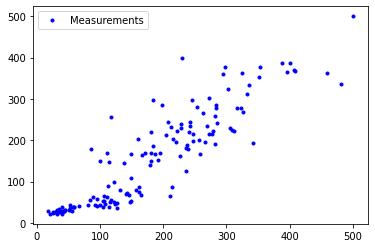

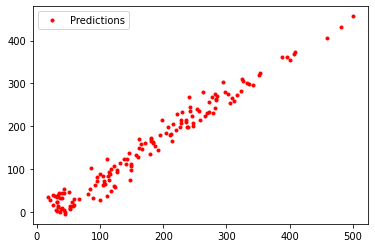

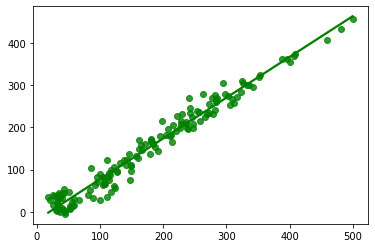

In [26]:
#hyperparameter tuning commented to preserve output of validation set
max1=0.0
max2=0.0
alpha1=0.0
alpha2=0.0
for i in range(1000):
  j=float(i)/100.0
  kernelridge_linear_regr_sv = KernelRidge(alpha=j,kernel='linear')
  kernelridge_linear_regr_mv = KernelRidge(alpha=j,kernel='linear')
  kernelridge_linear_regr_sv.fit(X,Y)
  kernelridge_linear_regr_mv.fit(X_MLR, Y)
  y_pred_kerreg_linear_pka_valid = kernelridge_linear_regr_sv.predict(X)
  y_pred_kerreg_linear_hfus_valid = kernelridge_linear_regr_mv.predict(X_MLR)
  r2_score1=r2_score(Y, y_pred_kerreg_linear_pka_valid)
  r2_score2=r2_score(Y, y_pred_kerreg_linear_hfus_valid)
  if(max1<r2_score1):
    alpha1=j
  if(max2<r2_score2):
    alpha2=j

kernelridge_linear_regr_sv = KernelRidge(alpha=alpha1,kernel='linear')
kernelridge_linear_regr_mv = KernelRidge(alpha=alpha2,kernel='linear')
kernelridge_linear_regr_sv.fit(X,Y)
kernelridge_linear_regr_mv.fit(X_MLR,Y)


y_pred_kerreg_linear_sv = kernelridge_linear_regr_sv.predict(X)
y_pred_kerreg_linear_mv = kernelridge_linear_regr_mv.predict(X_MLR)
metrics_calc(y_pred_kerreg_linear_sv,Y)
metrics_calc(y_pred_kerreg_linear_mv,Y)


plt.plot(X,Y,".",color="b")
plt.legend(["Measurements"])
plt.show()
plt.plot(X,y_pred_kerreg_linear_mv,".",color='r')
plt.legend(["Predictions"])
plt.show()

import seaborn as sns
import seaborn as sns
sns.regplot(x=X, y=y_pred_kerreg_linear_mv, ci=None, color="g")



In [58]:
knn_regr_pka = KNeighborsRegressor(n_neighbors=5,weights='uniform',p=2,metric='minkowski')
knn_regr_hfus = KNeighborsRegressor(n_neighbors=7,weights='uniform',p=2,metric='minkowski')
knn_regr_pka.fit(X, Y)
knn_regr_hfus.fit(X_MLR,Y)

KNeighborsRegressor(n_neighbors=7)

Best leaf_size: 1
Best p: 1
Best n_neighbors: 5
Best leaf_size: 1
Best p: 1
Best n_neighbors: 1
Coefficient of determination R squared  : 0.8283995337062441
RMSE for given case : 1919.1974902793347
MAE for given case: 28.73734955220596
Bias corected RMSE for given case : 0.023965527215170652
Bias Corrected MAE for given case: -1.0268962643324128e-17


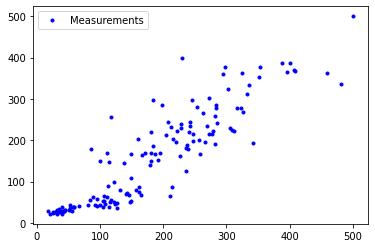

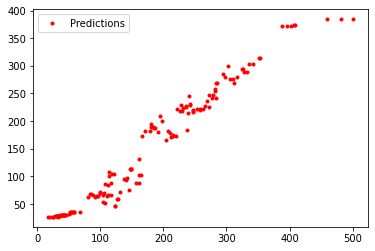

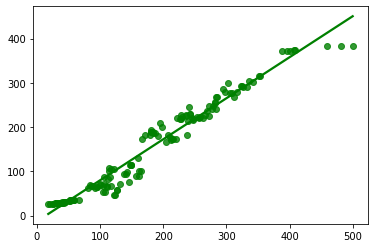

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV

leaf_size = list(range(1,10))
n_neighbors = list(range(1,10))
p=[1,2]
hyperparameters1 = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
knn_21 = KNeighborsRegressor()
clf1 = GridSearchCV(knn_21, hyperparameters1, cv=5)
best_model1 = clf1.fit(X,Y)
print('Best leaf_size:', best_model1.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model1.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model1.best_estimator_.get_params()['n_neighbors'])

hyperparameters2 = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
knn_22 = KNeighborsRegressor()
clf2 = GridSearchCV(knn_22, hyperparameters2, cv=5)
best_model2 = clf2.fit(X_MLR,Y)
print('Best leaf_size:', best_model2.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model2.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model2.best_estimator_.get_params()['n_neighbors'])

knn_regr_pka = KNeighborsRegressor(n_neighbors=5,weights='uniform',p=2,metric='minkowski')
knn_regr_hfus = KNeighborsRegressor(n_neighbors=7,weights='uniform',p=2,metric='minkowski')
knn_regr_pka.fit(X, Y)
knn_regr_hfus.fit(X_MLR, Y)

y_pred_knn_pka_valid = knn_regr_pka.predict(X)
y_pred_knn_poly_hfus_valid = knn_regr_hfus.predict(X_MLR)

metrics_calc(y_pred_knn_poly_hfus_valid,Y)

plt.plot(X,Y,".",color="b")
plt.legend(["Measurements"])
plt.show()
plt.plot(X,y_pred_knn_poly_hfus_valid,".",color='r')
plt.legend(["Predictions"])
plt.show()

import seaborn as sns
import seaborn as sns
sns.regplot(x=X, y=y_pred_knn_poly_hfus_valid, ci=None, color="g")


In [27]:
kernel = DotProduct() + WhiteKernel()
gpr_regr_pka = GaussianProcessRegressor(kernel=kernel,random_state=200,n_restarts_optimizer=10,alpha=0.025)
gpr_regr_hfus = GaussianProcessRegressor(kernel=kernel,random_state=200,n_restarts_optimizer=10,alpha=0.017)
gpr_regr_pka.fit(X, Y)
gpr_regr_hfus.fit(X_MLR, Y)

GaussianProcessRegressor(alpha=0.017,
                         kernel=DotProduct(sigma_0=1) + WhiteKernel(noise_level=1),
                         n_restarts_optimizer=10, random_state=200)

Coefficient of determination R squared  : 0.834467358741199
RMSE for given case : 1868.7144363279638
MAE for given case: 31.56940244032075
Bias corected RMSE for given case : 0.0234019714235519
Bias Corrected MAE for given case: 3.045705988033263e-17


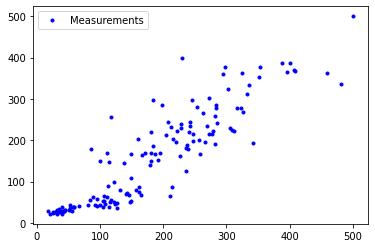

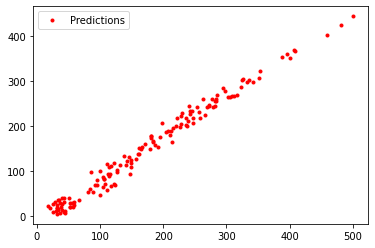

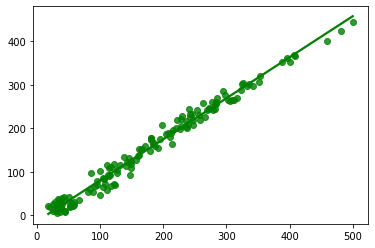

In [28]:
y_pred_gpr_pka_valid = gpr_regr_pka.predict(X)
y_pred_gpr_poly_hfus_valid = gpr_regr_hfus.predict(X_MLR)

metrics_calc(y_pred_gpr_poly_hfus_valid,Y)

plt.plot(X,Y,".",color="b")
plt.legend(["Measurements"])
plt.show()
plt.plot(X,y_pred_gpr_poly_hfus_valid,".",color='r')
plt.legend(["Predictions"])
plt.show()

import seaborn as sns
import seaborn as sns
sns.regplot(x=X, y=y_pred_gpr_poly_hfus_valid, ci=None, color="g")

